## 加载 FASHION_MNIST 数据集

In [1]:
import tensorflow as tf
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape, type(x_train))
print(y_train.shape, type(y_train))
print(x_test.shape, type(x_test))
print(y_test.shape, type(y_test))

Using TensorFlow backend.


(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>
(10000, 28, 28) <class 'numpy.ndarray'>
(10000,) <class 'numpy.ndarray'>


## 数据处理：规范化

In [2]:
from keras import backend as K

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


print(x_train.shape, type(x_train))
print(x_test.shape, type(x_test))

(60000, 28, 28, 1) <class 'numpy.ndarray'>
(10000, 28, 28, 1) <class 'numpy.ndarray'>


In [3]:
# 将数据类型转换为float32
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
# 数据归一化
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## 统计训练数据中各标签数量

In [4]:
import numpy as np
import matplotlib.pyplot as plt

label, count = np.unique(y_train, return_counts=True)
print(label, count)

[0 1 2 3 4 5 6 7 8 9] [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


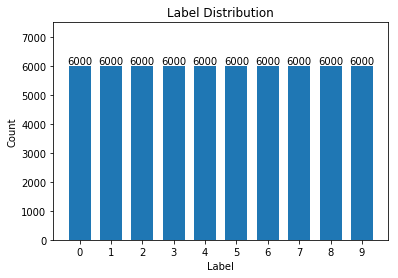

In [5]:
fig = plt.figure()
plt.bar(label, count, width = 0.7, align='center')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label, count):
    plt.text(a, b, '%d' % b, ha='center', va='bottom',fontsize=10)

plt.show()

In [6]:
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test, n_classes)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [7]:
print(y_train[0])
print(Y_train[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 使用 Keras sequential model 定义 MNIST CNN 网络


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (2, 2),padding='same',activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (2, 2), padding='same',activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## 查看 MNIST CNN 模型网络结构

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

In [10]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 28, 28, 32]
[None, 28, 28, 32]
[None, 28, 28, 32]
[None, 28, 28, 32]
[None, 14, 14, 32]
[None, 14, 14, 32]
[None, 14, 14, 64]
[None, 14, 14, 64]
[None, 14, 14, 64]
[None, 14, 14, 64]
[None, 7, 7, 64]
[None, 7, 7, 64]
[None, None]
[None, 512]
[None, 512]
[None, 1024]
[None, 1024]
[None, 10]


## 编译模型

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## 训练模型，并将指标保存到 history 中

In [12]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=135,
                    epochs=200,
                    verbose=2,
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
 - 8s - loss: 0.5192 - acc: 0.8169 - val_loss: 0.3182 - val_acc: 0.8875
Epoch 2/200
 - 7s - loss: 0.3144 - acc: 0.8865 - val_loss: 0.3151 - val_acc: 0.8840
Epoch 3/200
 - 7s - loss: 0.2686 - acc: 0.9030 - val_loss: 0.2772 - val_acc: 0.9040
Epoch 4/200
 - 7s - loss: 0.2454 - acc: 0.9120 - val_loss: 0.2393 - val_acc: 0.9152
Epoch 5/200
 - 7s - loss: 0.2244 - acc: 0.9194 - val_loss: 0.2283 - val_acc: 0.9219
Epoch 6/200
 - 7s - loss: 0.2109 - acc: 0.9241 - val_loss: 0.2191 - val_acc: 0.9196
Epoch 7/200
 - 7s - loss: 0.2039 - acc: 0.9273 - val_loss: 0.2137 - val_acc: 0.9241
Epoch 8/200
 - 7s - loss: 0.1919 - acc: 0.9316 - val_loss: 0.2181 - val_acc: 0.9231
Epoch 9/200
 - 7s - loss: 0.1806 - acc: 0.9349 - val_loss: 0.2168 - val_acc: 0.9305
Epoch 10/200
 - 7s - loss: 0.1714 - acc: 0.9387 - val_loss: 0.2254 - val_acc: 0.9254
Epoch 11/200
 - 7s - loss: 0.1672 - acc: 0.9406 - val_loss: 0.2164 - val_acc: 0.9273
Epoch 12/200
 - 7s - los

Epoch 97/200
 - 7s - loss: 0.0284 - acc: 0.9906 - val_loss: 0.3375 - val_acc: 0.9399
Epoch 98/200
 - 7s - loss: 0.0265 - acc: 0.9912 - val_loss: 0.2935 - val_acc: 0.9392
Epoch 99/200
 - 7s - loss: 0.0264 - acc: 0.9914 - val_loss: 0.3031 - val_acc: 0.9424
Epoch 100/200
 - 7s - loss: 0.0252 - acc: 0.9915 - val_loss: 0.3312 - val_acc: 0.9398
Epoch 101/200
 - 7s - loss: 0.0275 - acc: 0.9913 - val_loss: 0.3526 - val_acc: 0.9405
Epoch 102/200
 - 7s - loss: 0.0258 - acc: 0.9920 - val_loss: 0.3155 - val_acc: 0.9387
Epoch 103/200
 - 7s - loss: 0.0297 - acc: 0.9911 - val_loss: 0.2781 - val_acc: 0.9388
Epoch 104/200
 - 7s - loss: 0.0271 - acc: 0.9914 - val_loss: 0.3357 - val_acc: 0.9403
Epoch 105/200
 - 7s - loss: 0.0245 - acc: 0.9922 - val_loss: 0.3361 - val_acc: 0.9383
Epoch 106/200
 - 7s - loss: 0.0282 - acc: 0.9908 - val_loss: 0.3055 - val_acc: 0.9409
Epoch 107/200
 - 7s - loss: 0.0278 - acc: 0.9915 - val_loss: 0.3147 - val_acc: 0.9372
Epoch 108/200
 - 7s - loss: 0.0243 - acc: 0.9919 - val_lo

Epoch 193/200
 - 7s - loss: 0.0176 - acc: 0.9951 - val_loss: 0.3545 - val_acc: 0.9436
Epoch 194/200
 - 7s - loss: 0.0210 - acc: 0.9945 - val_loss: 0.3611 - val_acc: 0.9410
Epoch 195/200
 - 7s - loss: 0.0180 - acc: 0.9948 - val_loss: 0.3546 - val_acc: 0.9425
Epoch 196/200
 - 7s - loss: 0.0176 - acc: 0.9948 - val_loss: 0.3728 - val_acc: 0.9453
Epoch 197/200
 - 7s - loss: 0.0190 - acc: 0.9945 - val_loss: 0.3246 - val_acc: 0.9416
Epoch 198/200
 - 7s - loss: 0.0188 - acc: 0.9947 - val_loss: 0.3522 - val_acc: 0.9431
Epoch 199/200
 - 7s - loss: 0.0199 - acc: 0.9943 - val_loss: 0.3249 - val_acc: 0.9414
Epoch 200/200
 - 7s - loss: 0.0219 - acc: 0.9939 - val_loss: 0.3343 - val_acc: 0.9436


## 可视化指标

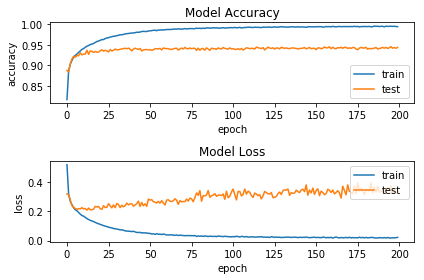

In [13]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

## 保存模型

In [14]:
import os
import tensorflow.gfile as gfile

save_dir = "./mnist/model/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./mnist/model/keras_mnist.h5 


## 加载模型

In [15]:
from keras.models import load_model

mnist_model = load_model(model_path)

## 统计模型在测试集上的分类结果

In [16]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.3343008576719498
Test Accuracy: 94.36%
Classified correctly count: 9436
Classified incorrectly count: 564
